# <u>***EDA and engineering of Quality***<u>

---
---

### ***1. EDA -- What makes a review a good review?***

#### <u>used dataset: review_1918.csv<u>

---
---

#### ***1.1 Import necessary modules***

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

import nltk
from nltk.corpus import stopwords

# -------------------------------- 

import spacy
import contextualSpellCheck
import en_core_web_sm
from spacy.lang.en.examples import sentences

!ln -s /Users/felixbecker/neuefische/Yelp-Capstone/modeling/Language.py Language.py
from Language import language_processing

from wordcloud import WordCloud

import unicodedata

ln: Language.py: File exists


---

#### ***1.2 Set global parameters***

In [33]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['figure.dpi'] = 150

---

#### ***1.3 Import dataset***

In [170]:
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

---

#### ***1.4 Overview of the dataset***

In [171]:
df_rev.shape

(1813646, 11)

In [172]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813646 entries, 0 to 1813645
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       int64  
 6   funny        int64  
 7   cool         int64  
 8   text         object 
 9   date         object 
 10  year         int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 152.2+ MB


In [37]:
df_rev.sample(10)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
1001494,3912642,-UxVqMRZlVI8R70daN5YZA,46h2sDaFXksvKYOMQ5lnpQ,ssr49VxAlvrBo7F7izQvXA,1.0,0,0,0,Manger charged 15$ for drink. Was not tasty. R...,2019-06-22 21:55:04,2019
1792494,6886260,RaQe9A2-nIPQdlzum9Rdnw,YOOcXNnqzgUKG8JVtC5RdA,hy-E7DdXbdgTbwphKUYW1w,1.0,1,0,0,This company probably advertises with yelp in ...,2019-07-09 04:01:18,2019
607757,2453915,lp6F5cZIqEo0FLjgAepRBw,KYXdlR_sPs5ph--u3XgwVQ,TV58NdbRgHq2IMxyzHWDbQ,3.0,1,0,0,I'd give this place a solid 3 stars due to the...,2018-01-09 04:49:00,2018
1638809,6337309,_PPHc4EdkrPCVgbTqJV7kQ,J4PpGONrhS57T0KL5XyR3w,Y-woMivHkCk4W3tTl1ktTA,5.0,0,0,0,This is probably one of my favorite casual eat...,2018-05-11 00:30:08,2018
1165480,4564457,rmHMfm9DZJMfzizL6CuB3A,CBz-yziWSSLNoMG__3kknw,1YMF0G6kZKqCXlzMGqh5Rw,5.0,1,0,0,#BradyEats for more tasty \nChef Jimmy makes s...,2019-07-10 02:57:26,2019
1026753,3961703,OAdXiMHqlFaVUzmIsr3DxQ,yJaH73K_atH8IFaHQaUlQQ,VZqrQ1dEOUWp-A1hNsdZBw,5.0,1,0,1,I was in town on business was planning to stay...,2018-05-13 16:46:39,2018
878349,3381909,uytpFcIvwN7FCZOcnbMwpQ,9NaPA3cbT0VRvhWT0a5WGg,N5uOeSSU_X2z41ojI80t7w,5.0,0,0,1,Absolutely amazing! Loved our room and will de...,2019-01-13 14:46:47,2019
1508055,5930993,RP1VIc90vhcJBGwR121Bnw,VJCj_edVmpzEBj-Af85QvA,VoZy_JSjprhjeAI8MUJLFA,5.0,0,0,0,"Excellent food, excellent service, very cute i...",2018-11-30 16:30:57,2018
242683,1070823,QZSW2FH6JytZwBR6TqGFmw,yKcQYLq_KXKp4V_clS3hyA,xlMQBBt9wrtahdqiRDcVSg,1.0,0,0,0,So disappointed in Yelp or the Distillery as t...,2019-08-04 04:26:42,2019
1365699,5313147,57yO3DbxheTqCLWdVqL23g,5rHxypZXthrCWgJOri9xow,K3RURR9lIEE4JjOaPt99zg,4.0,0,0,0,The food here has alway been fresh and delicio...,2018-10-21 23:19:49,2018


In [38]:
df_rev.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

---

#### ***1.5 Cleaning the dataset***

In [176]:
# Dropping 'Unnamed: 0', 'date', 'year'

df_rev.drop(['Unnamed: 0', 'date', 'year'], axis=1, inplace=True)

---

#### ***1.6 Gain information on rating***

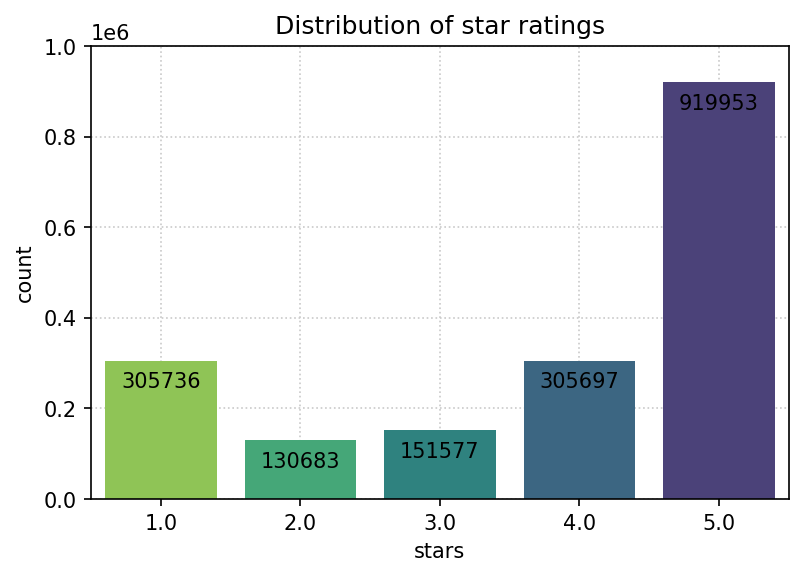

In [40]:
ax = sns.countplot(data=df_rev, x='stars', palette='viridis_r', zorder=2)
plt.title('Distribution of star ratings')
plt.ylim(0, 1000000)
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

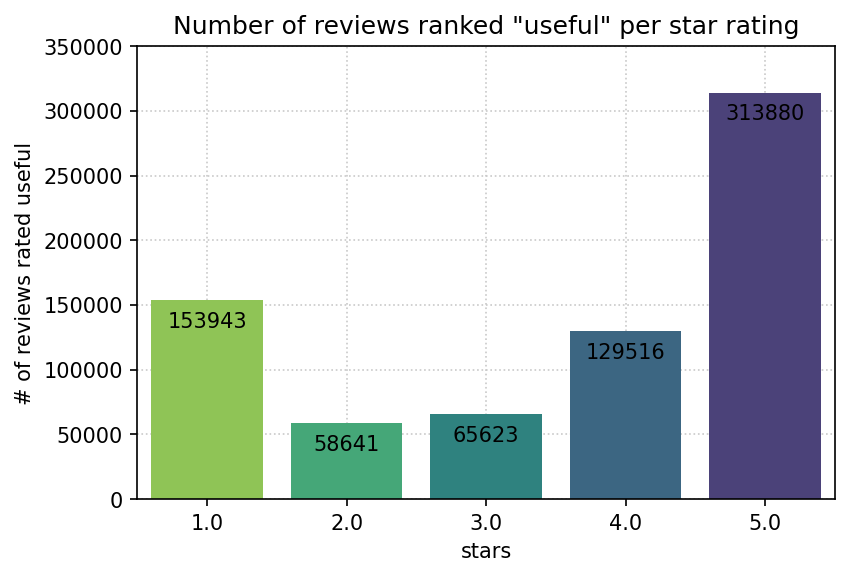

In [235]:
ax = sns.countplot(data=df_rev.query('useful != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 350000)
plt.ylabel('# of reviews rated useful')
plt.title('Number of reviews ranked "useful" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

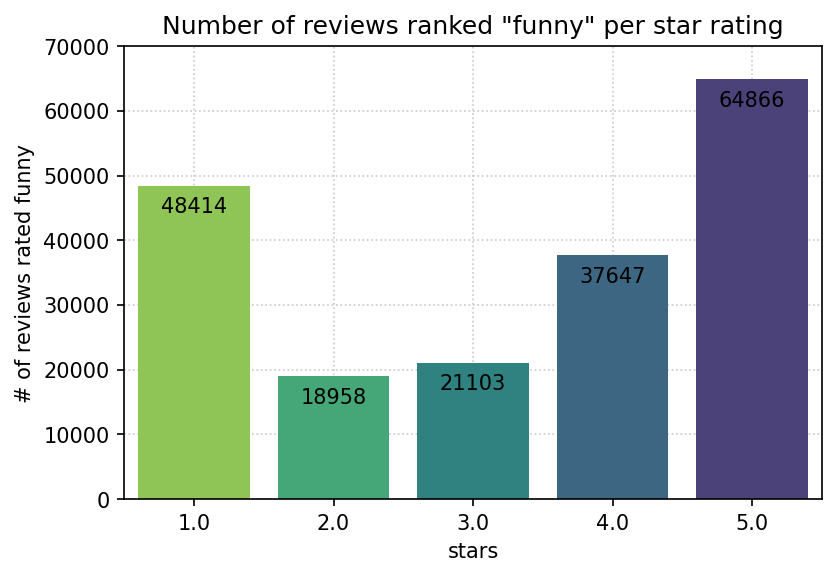

In [119]:
ax = sns.countplot(data=df_rev.query('funny != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 70000)
plt.ylabel('# of reviews rated funny')
plt.title('Number of reviews ranked "funny" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

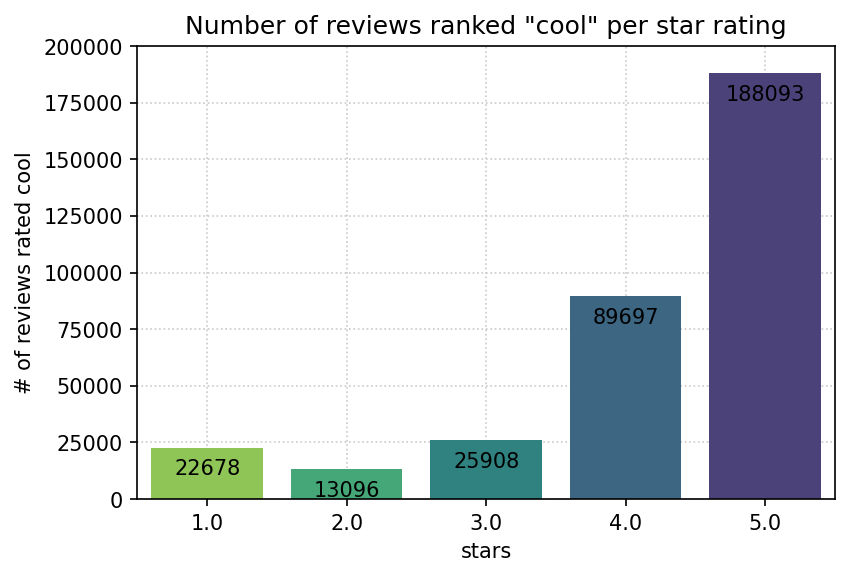

In [121]:
ax = sns.countplot(data=df_rev.query('cool != 0'), x='stars', palette='viridis_r', zorder=2)
plt.ylim(0, 200000)
plt.ylabel('# of reviews rated cool')
plt.title('Number of reviews ranked "cool" per star rating')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

In [177]:
df_corr = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

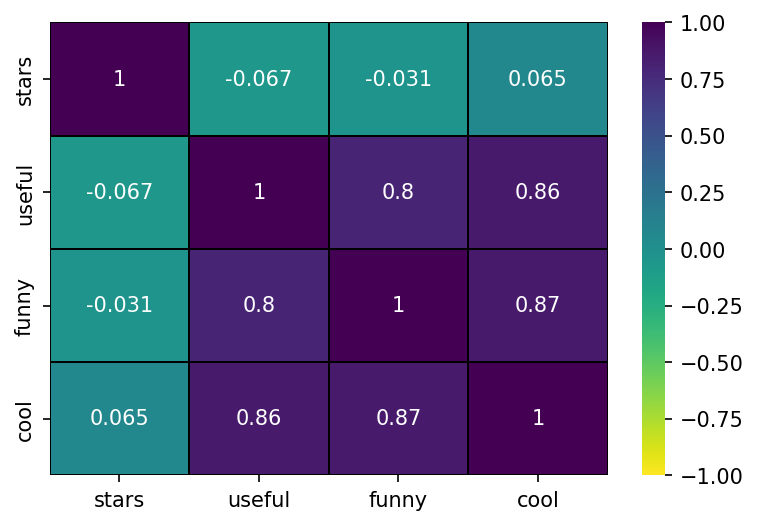

In [178]:
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

***Without considering the actual review message there is no useable correlation between star rating and no. of usefulness of the reviews***

---

#### ***1.7 Gain information on texts***

In [179]:
# Get the number of unique words per review and save it to new column

df_rev['unique_words'] = df_rev['text'].apply(lambda x : len(set(str(x).split())))

# Get the number of used exclamation marks per review

df_rev['count_excl'] = df_rev['text'].str.count('!')

# Remove punctuation

df_rev["no_punct"] = df_rev['text'].str.replace('[^\w\s]','')

# Get the length of each review and save it to new column

df_rev['text_length'] = df_rev['no_punct'].str.len()

In [180]:
# Calculate mean text length per star rating and save in list

mean_lengths = []
mean_text_one = df_rev.query('stars == 1').text_length.mean().astype(int)
mean_lengths.append(mean_text_one)
mean_text_two = df_rev.query('stars == 2').text_length.mean().astype(int)
mean_lengths.append(mean_text_two)
mean_text_three = df_rev.query('stars == 3').text_length.mean().astype(int)
mean_lengths.append(mean_text_three)
mean_text_four = df_rev.query('stars == 4').text_length.mean().astype(int)
mean_lengths.append(mean_text_four)
mean_text_five = df_rev.query('stars == 5').text_length.mean().astype(int)
mean_lengths.append(mean_text_five)

mean_stars = [1.0, 2.0, 3.0, 4.0, 5.0]

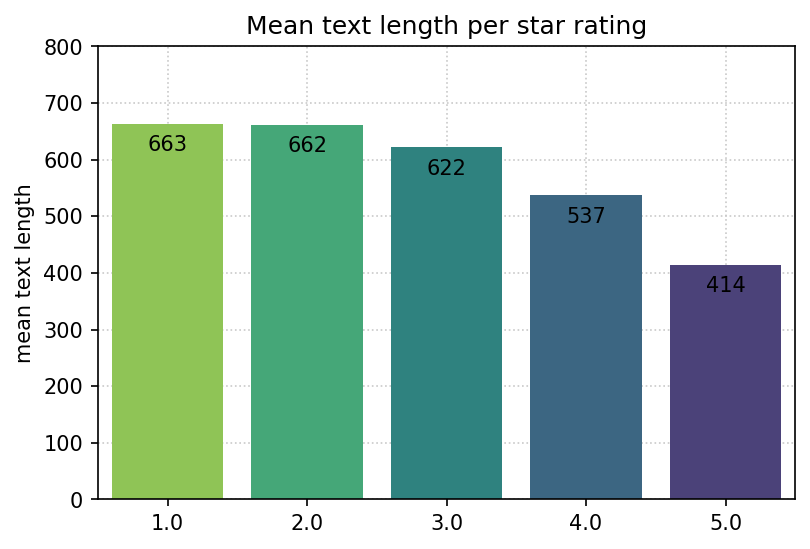

In [181]:
ax = sns.barplot(x=mean_stars, y=mean_lengths, palette='viridis_r', zorder=2)
plt.title('Mean text length per star rating')
plt.ylim(0, 800)
plt.ylabel('mean text length')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

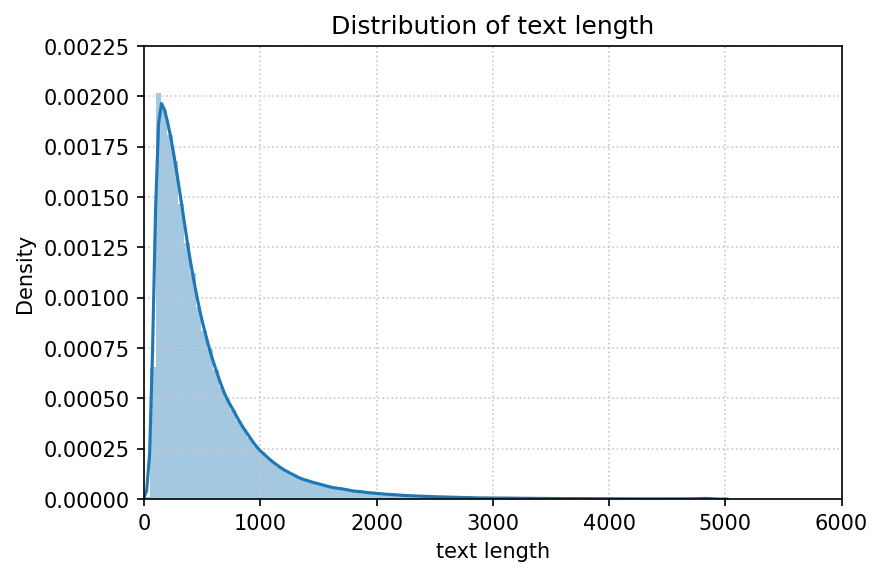

In [185]:
sns.distplot(df_rev['text_length'], bins=100)
plt.title('Distribution of text length')
plt.xlim(0, 6000)
plt.ylim(0, 0.00225)
plt.xlabel('text length')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

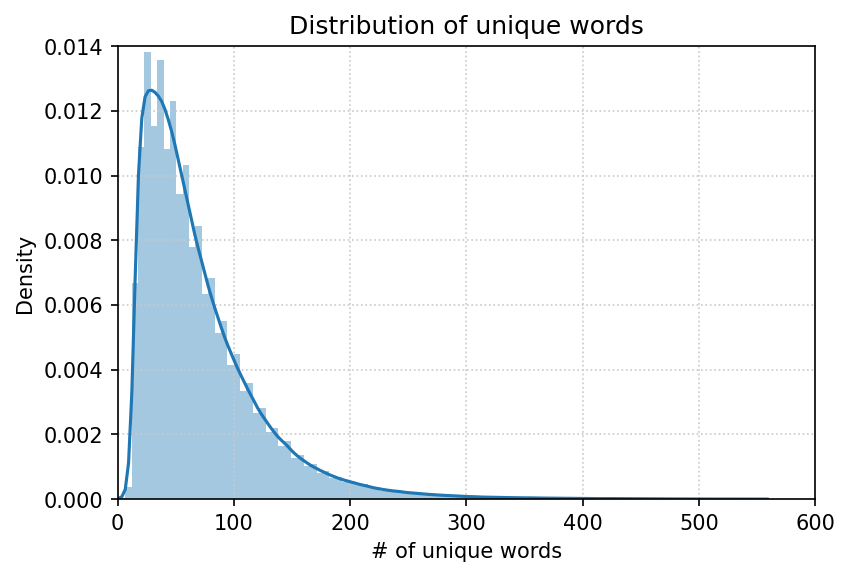

In [183]:
sns.distplot(df_rev['unique_words'], bins=100)
plt.title('Distribution of unique words')
plt.xlim(0, 600)
plt.ylim(0, 0.014)
plt.xlabel('# of unique words')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)

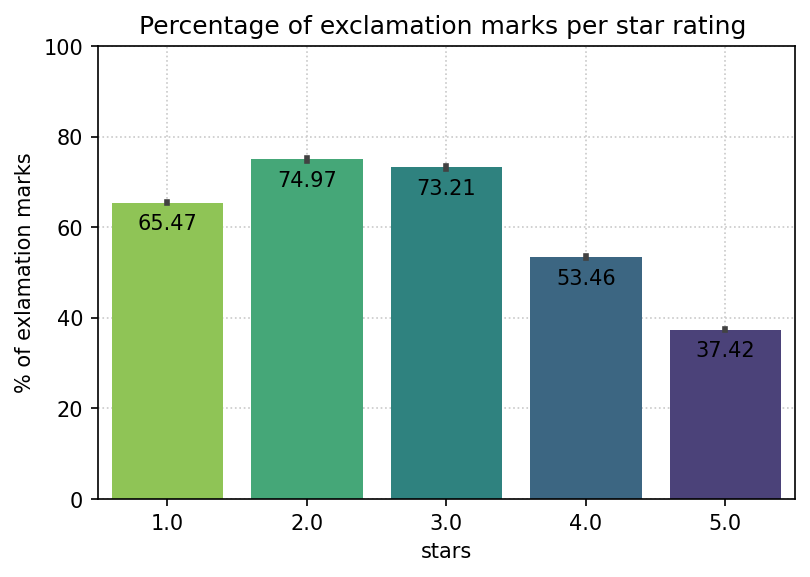

In [212]:
ax = sns.barplot(data=df_rev, x='stars', y='count_excl', estimator=lambda x : round(sum(x==0)*100.0/len(x),2), palette='viridis_r', zorder=2)
plt.title('Percentage of exclamation marks per star rating ')
plt.ylim(0, 100)
plt.ylabel('% of exlamation marks')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.bar_label(ax.containers[0], padding=-15);

In [202]:
df_corr_excl = df_rev.drop(['review_id', 'user_id', 'business_id'], axis=1)

<AxesSubplot:>

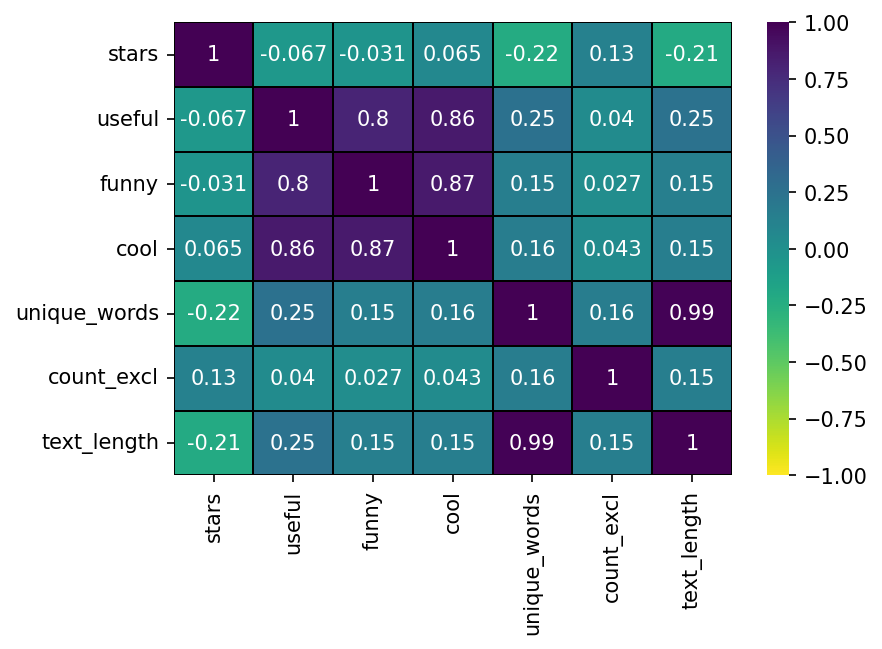

In [203]:
sns.heatmap(df_corr_excl.corr(), annot=True, cmap='viridis_r', linewidth=0.01, linecolor='k', vmin=-1, vmax=1)

---
---

### ***2. Language and spelling***

---
---

#### ***2.1 Language processing***

In [55]:
# Predict the language per review with a certainty of at least 95%
# Drop all other languages than english
# Return the corresponding dataframe

language_processing(df_rev);

In [56]:
# Cleaning in language_processing is not applied in place!

df_rev = df_rev[df_rev['language'] == 'English']

---

#### ***2.2 Create word clouds for useful, funny and cool***

In [57]:
df_use = df_rev[df_rev['useful'] != 0]
df_fun = df_rev[df_rev['funny'] != 0]
df_cool = df_rev[df_rev['cool'] != 0]

In [58]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

# create a wordcloud using all the text in text
text_use = " ".join(text for text in df_use['text'])
text_fun = " ".join(text for text in df_fun['text'])
text_cool = " ".join(text for text in df_cool['text'])

#remove the stopwords from the text
wordcloud_use = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_fun = WordCloud(stopwords=stopwords).generate(text_use)
wordcloud_cool = WordCloud(stopwords=stopwords).generate(text_use)

#### ***World Cloud for reviews rated as useful***

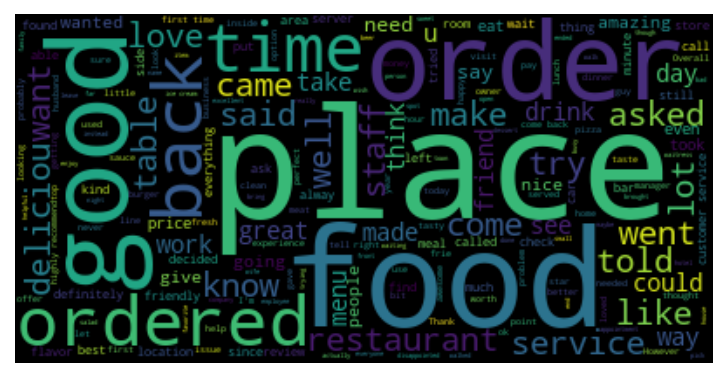

In [59]:
plt.imshow(wordcloud_use, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as funny***

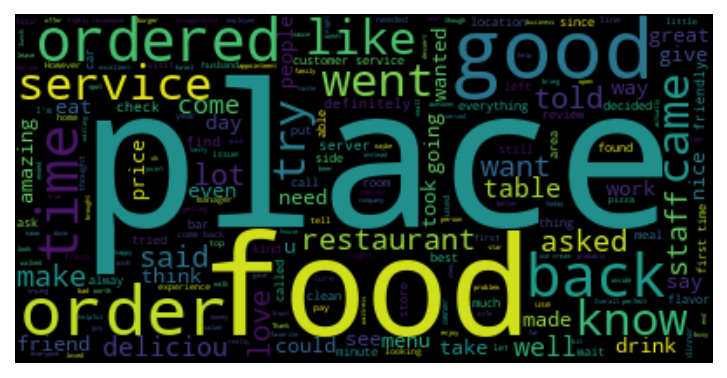

In [60]:
plt.imshow(wordcloud_fun, interpolation='bilinear')
plt.axis("off");

#### ***World Cloud for reviews rated as cool***

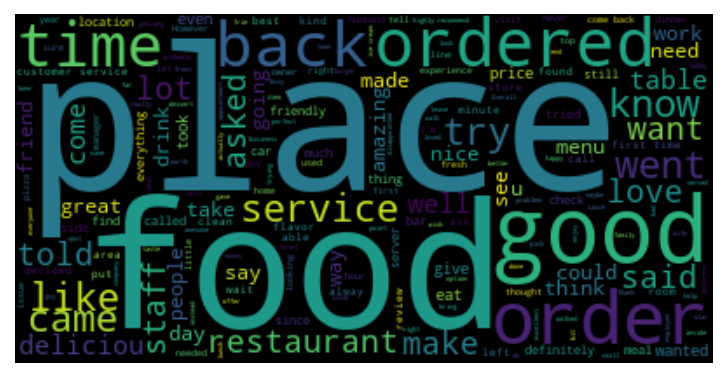

In [61]:
plt.imshow(wordcloud_cool, interpolation='bilinear')
plt.axis("off");
#print(wordcloud_cool.words_.keys())

---

#### ***2.3 Text cleaning and building N-grams for useful, funny and cool rated reviews***

In [62]:
# Basic text cleaning and Lemmatization

def text_cleaning(txt):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
    stopwords.extend(additional_stopwords)
    txt = (unicodedata.normalize('NFKD', txt)).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    words = re.sub(r'[^\w\s]', '', txt).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
# Apply the basic text cleaning and Lemmatization on each word list

words_use = text_cleaning(''.join(str(df_use['text'].tolist())))
words_fun = text_cleaning(''.join(str(df_fun['text'].tolist())))
words_cool = text_cleaning(''.join(str(df_cool['text'].tolist())))

In [ ]:
# "Building" the N-grams of size 3 (Trigrams)
# CAREFUL THIS TAKES MORE THAN 4 HOURS

trigrams_use = (pd.Series(nltk.ngrams(words_use, 3)).value_counts())[:10]
trigrams_fun = (pd.Series(nltk.ngrams(words_fun, 3)).value_counts())[:10]
trigrams_cool = (pd.Series(nltk.ngrams(words_cool, 3)).value_counts())[:10]

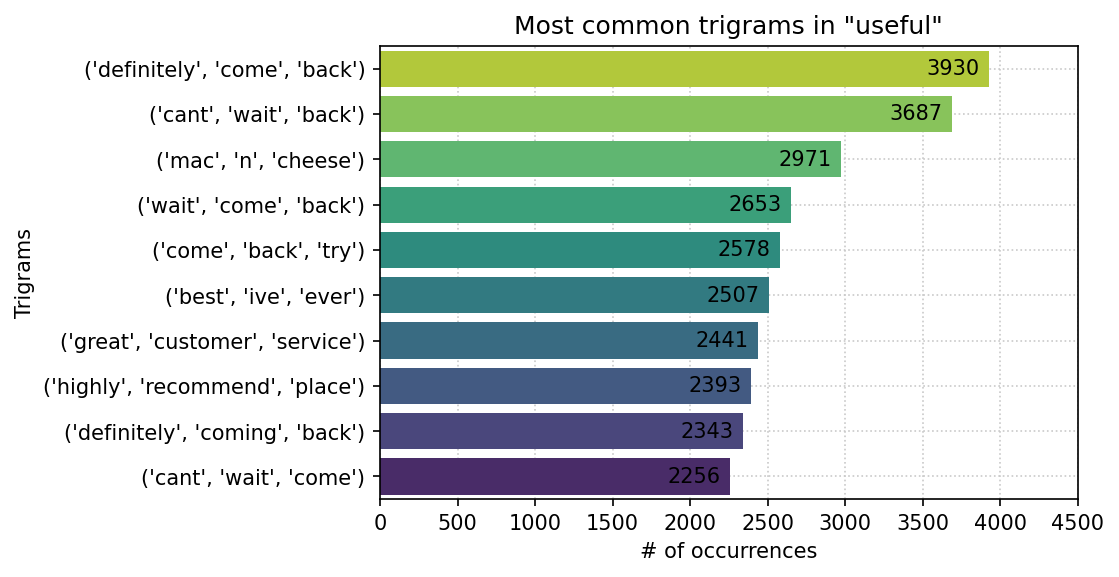

In [ ]:
ax = sns.barplot(x=trigrams_use.values, y=trigrams_use.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "useful"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,4500)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

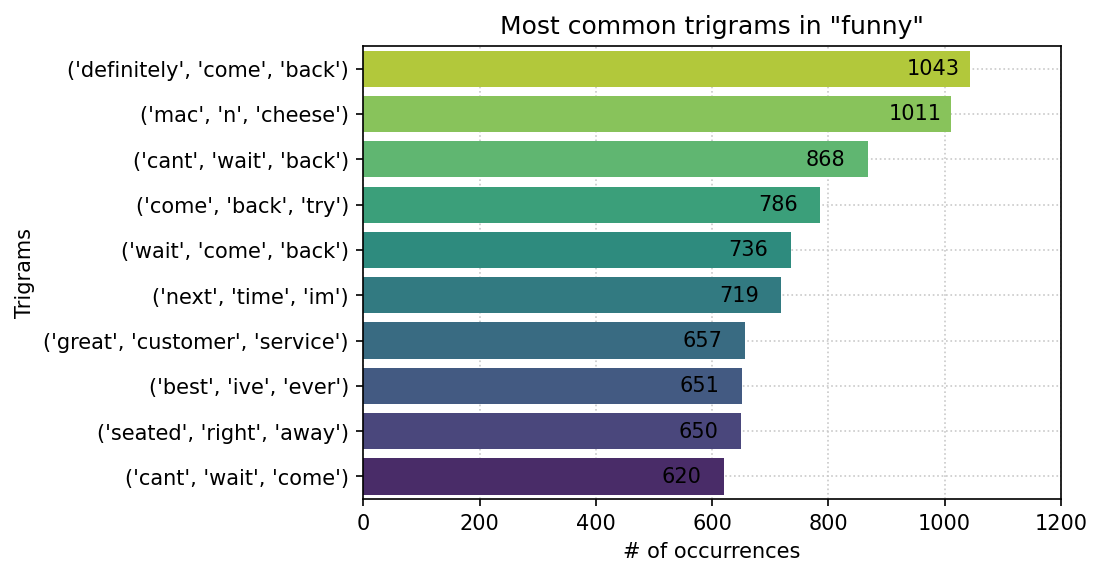

In [ ]:
ax = sns.barplot(x=trigrams_fun.values, y=trigrams_fun.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "funny"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,1200)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

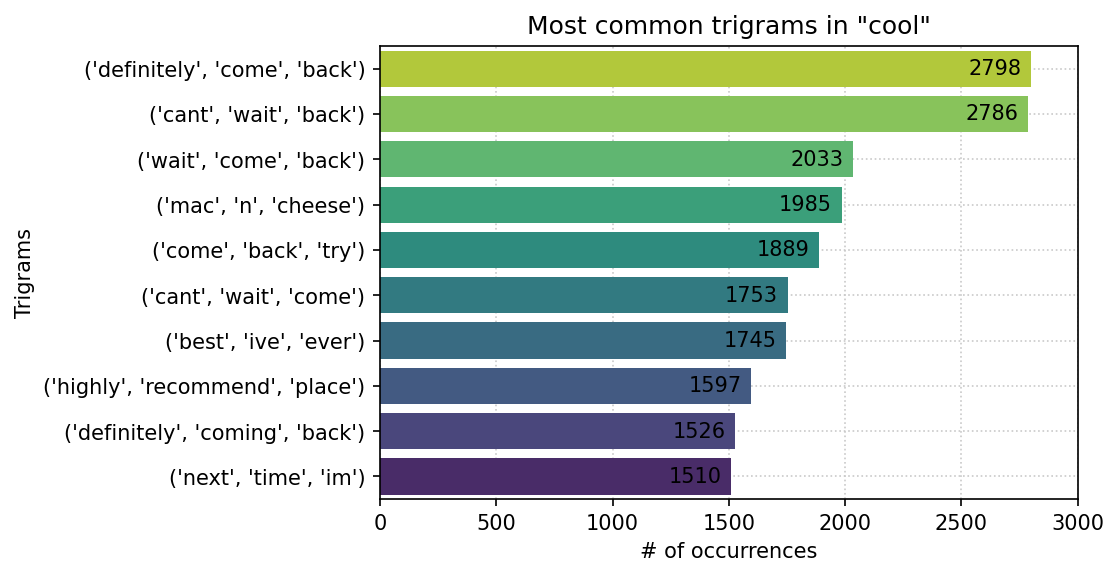

In [ ]:
ax = sns.barplot(x=trigrams_cool.values, y=trigrams_cool.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "cool"')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,3000)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---

#### ***2.4 Create word clouds for reviews with star ratings ≤ 2***

In [63]:
df_bad = df_rev[df_rev['stars'] <= 2]

In [64]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

text_bad = " ".join(text for text in df_bad['text'])
wordcloud_bad = WordCloud(stopwords=stopwords).generate(text_bad)

#### ***Word Cloud for "bad" reviews***

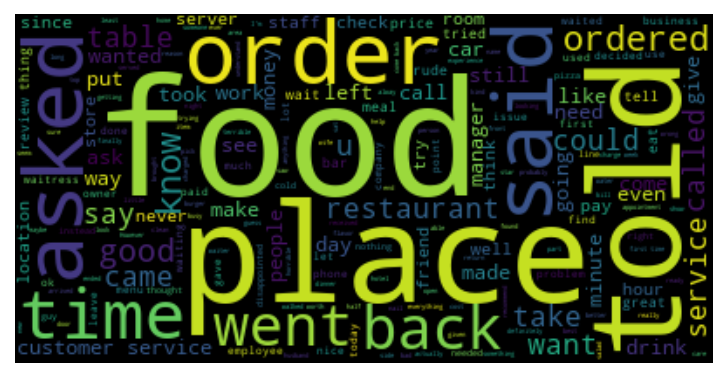

In [65]:
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off");

In [66]:
words_bad = text_cleaning(''.join(str(df_bad['text'].tolist())))

In [67]:
trigrams_bad = (pd.Series(nltk.ngrams(words_bad, 3)).value_counts())[:10]

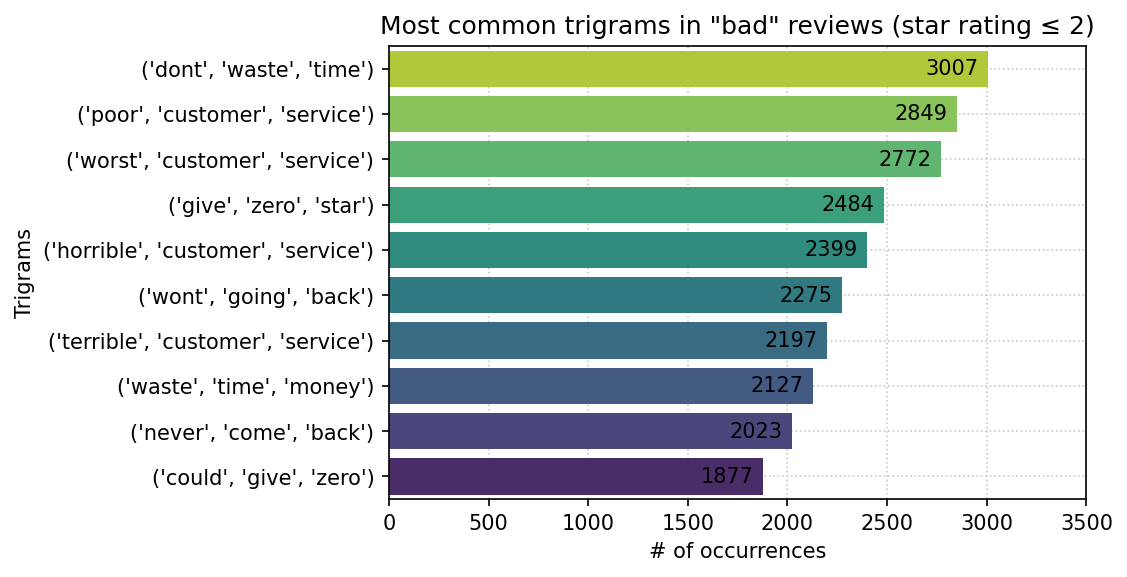

In [68]:
ax = sns.barplot(x=trigrams_bad.values, y=trigrams_bad.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "bad" reviews (star rating ≤ 2)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,3500)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---

#### ***2.5 Create word clouds for reviews with star ratings ≥ 4***

In [69]:
df_good = df_rev[df_rev['stars'] >= 4]

In [70]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

text_good = " ".join(text for text in df_good['text'])
wordcloud_good = WordCloud(stopwords=stopwords).generate(text_good)

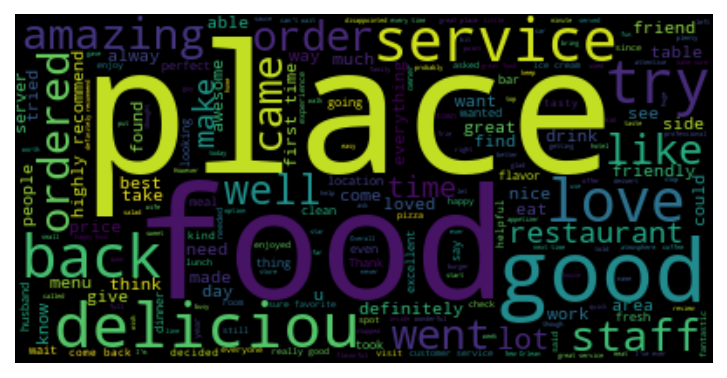

In [71]:
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off");

In [72]:
words_good = text_cleaning(''.join(str(df_good['text'].tolist())))

In [73]:
trigrams_good = (pd.Series(nltk.ngrams(words_good, 3)).value_counts())[:10]

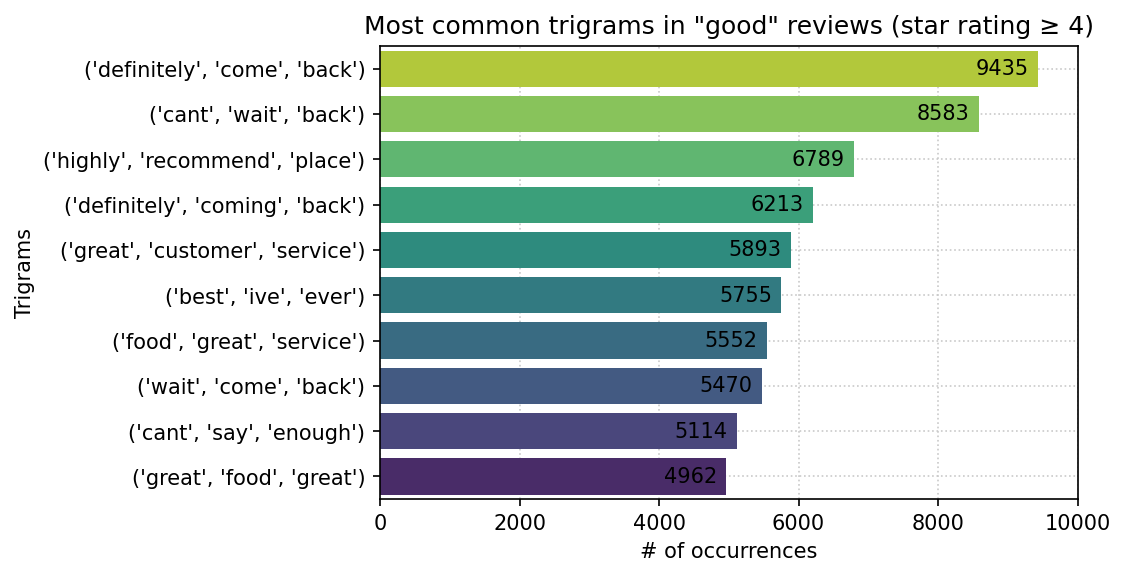

In [96]:
ax = sns.barplot(x=trigrams_good.values, y=trigrams_good.index, palette='viridis_r', zorder=2)
plt.title('Most common trigrams in "good" reviews (star rating ≥ 4)')
plt.grid(which='major', axis='both', color='#C9C9C9', linestyle=':', zorder=0)
plt.xlim(0,10000)
plt.xlabel('# of occurrences')
plt.ylabel('Trigrams')
plt.bar_label(ax.containers[0], padding=-30);

---
---

### ***3. Rating and Rating***

---
---

#### ***3.1 Useful 1-5 Stars***